Import all the necessary libraries

In [ ]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset from a csv file uploaded to GitHub

In [ ]:
card = pd.read_csv('https://raw.githubusercontent.com/CinderLeaf/CIS9660_Lab3/main/clean_data.csv')

Take a look at the dataset

In [ ]:
card.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [ ]:
card.shape

(9709, 20)

We can see that there is no empty roll as this dataset has already been cleaned. 

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

Drop the ID column as it is not relevant in this lab

In [ ]:
card.drop(['ID'], axis = 1, inplace = True)
card.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In the dataset, client with a high risk is labeled as 1, and client with a low risk is labeled as 0. 

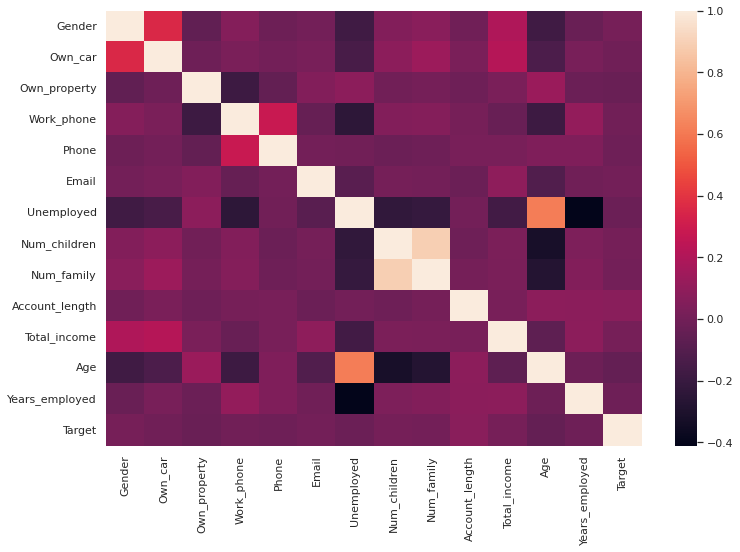

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})

sns.heatmap(card.corr())
plt.show()

Generate a bar chart to show the ratio of unemployment among good clients and bad clients

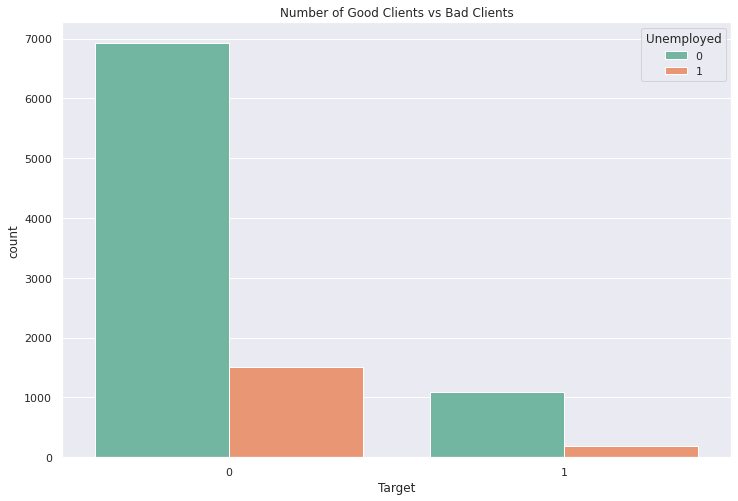

In [ ]:
sns.countplot(x = 'Target', data = card, hue = 'Unemployed', palette = 'Set2').set(title = "Number of Good Clients vs Bad Clients")
plt.show()

Generate a histogram to show the distribution of age and unemployment as these two features are highly correlated

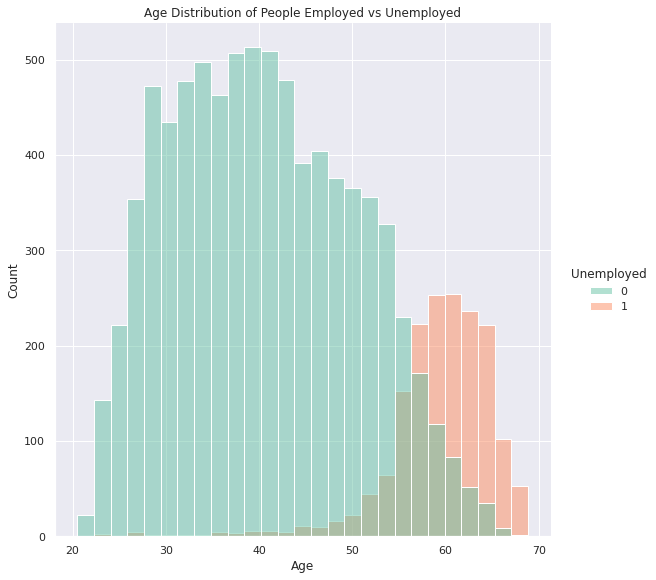

In [ ]:
sns.displot(x = card['Age'], hue = card['Unemployed'], palette = 'Set2', height = 8).set(title = 'Age Distribution of People Employed vs Unemployed')
plt.show()

Generate a boxplot to compare the total income between good clients and bad clients

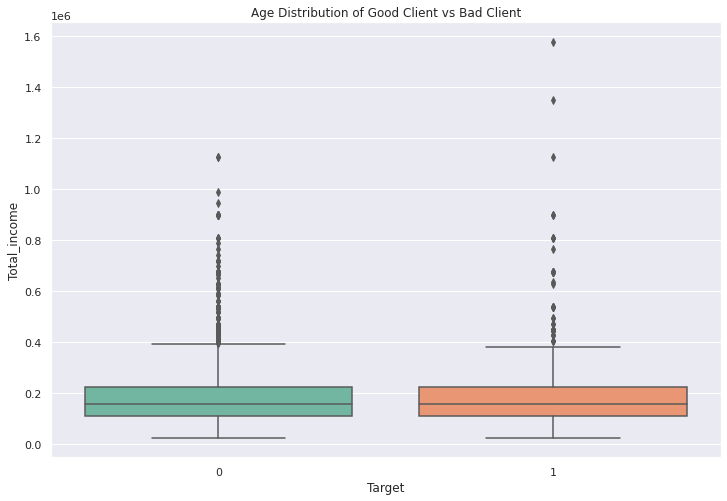

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.boxplot(x = 'Target', y = 'Total_income', data = card, palette = 'Set2').set(title = 'Age Distribution of Good Client vs Bad Client')
plt.figure(figsize=(20,20))
plt.show()

There are several columns that need to be encoded, which are Income_type, Education_type, Family_status, and Housing_type.

In [ ]:
#Convert the categorical column by doing one hot encoding
Income_type_encoding = pd.get_dummies(card['Income_type'])
Education_type_encoding = pd.get_dummies(card['Education_type'])
Family_status_encoding = pd.get_dummies(card['Family_status'])
Housing_type_encoding = pd.get_dummies(card['Housing_type'])

#Drop the original columns
card.drop(['Income_type'], axis = 1, inplace = True)
card.drop(['Education_type'], axis = 1, inplace = True)
card.drop(['Family_status'], axis = 1, inplace = True)
card.drop(['Housing_type'], axis = 1, inplace = True)

#Add the encoded columns back to the dataset
card = card.join(Income_type_encoding)
card = card.join(Education_type_encoding)
card = card.join(Family_status_encoding)
card = card.join(Housing_type_encoding)

#Check the dataset to make sure everything is added correctly
card.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,1,1,1,1,0,0,0,0,2,15,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,0,0,0,0,2,29,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,1,0,0,1,4,...,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,1,20,...,0,1,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,0,0,2,5,...,1,0,0,0,0,1,0,0,0,0


Separate the features (x-variables) from the labels (y-variable). The label will be the Target column, and the features will be all the columns except Target and Occupation_type.

In [ ]:
#Define the features
X = card.drop(['Target', 'Occupation_type'], axis = 1).values
X

array([[1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [ ]:
#Define the label
y = card['Target'].values
y

array([1, 0, 0, ..., 1, 1, 1])

Split the dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

Perform feature scaling to avoid impacts from outliers

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train the two models, KNN and NB, with the training dataset

In [ ]:
#Import all the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Train the KNN model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train.ravel())

#Train the NB model
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

Perform a 5-Fold Cross Validation for KNN

In [ ]:
kf = KFold(n_splits = 5)

#Validate the training model based on its accuracy
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.8555025321386832


Perform a 5-Fold Cross Validation for NB

In [ ]:
#Validate the training model based on its accuracy
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.6945063411678137


KNN - Using the model to make predictions on the test dataset

In [ ]:
#Predict the test set results
y_pred_knn = knn.predict(X_test)

KNN - Classification report

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2511
           1       0.18      0.02      0.04       402

    accuracy                           0.85      2913
   macro avg       0.52      0.50      0.48      2913
weighted avg       0.77      0.85      0.80      2913



NB - Using the model to make predictions on the test dataset

In [ ]:
#Predict the test set results
y_pred_gnb = gnb.predict(X_test)

NB - Classification report

In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2511
           1       0.19      0.07      0.11       402

    accuracy                           0.83      2913
   macro avg       0.53      0.51      0.51      2913
weighted avg       0.77      0.83      0.79      2913

